# This file creates 3d plots in single and multiple window with various parameters
##### Authors: Chandrima & Abir (chakrabartychandrima91@gmail.com

In [3]:
import os
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
from scipy.optimize import curve_fit

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.patches as patches
import matplotlib.dates as mdates
%matplotlib inline
import matplotlib.animation as animation

from mpl_toolkits import mplot3d
from mpl_toolkits.axes_grid1 import make_axes_locatable

import shapefile as shp

#### Work From Office

In [4]:
R=xr.open_dataset('D:/pai/data/dailymean/daily_imdrain/rain_NC_0.25/1981-2010/dailyclim_rain25_1981_2010.nc')
uwnd=xr.open_dataset('D:/pai/data/dailymean/ncep_daily_uwind_Plevel/1981-2010/dailyclim_ncep_daily_uwnd.1981_2010.nc')
vwnd=xr.open_dataset('D:/pai/data/dailymean/ncep_daily_vwind_plevel/1981-2010/dailyclim_ncep_daily_vwnd.1981_2010.nc')
omega=xr.open_dataset('D:/pai/data/dailymean/ncep_daily_omega_plevel/1981-2010/dailyclim_ncep_daily_omega.1981_2010.nc')
T=xr.open_dataset('D:/pai/data/dailymean/ncep_daily_airT_surface/1981-2010/dailyclim_ncep_airT_1981_2010.nc')

In [13]:
R

<xarray.Dataset>
Dimensions:    (dayofyear: 366, lat: 129, lon: 135)
Coordinates:
  * lon        (lon) float32 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float32 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    Rainfall   (dayofyear, lat, lon) float32 ...

#### Work From home

In [5]:
# R=xr.open_dataset('C:/Users/DELL/Desktop/officeplot/dailyclim_rain25_1981_2010.nc')
# uwnd=xr.open_dataset('C:/Users/DELL/Desktop/officeplot/dailyclim_ncep_daily_uwnd.1981_2010.nc')
# vwnd=xr.open_dataset('C:/Users/DELL/Desktop/officeplot/dailyclim_ncep_daily_vwnd.1981_2010.nc')
# omega=xr.open_dataset('C:/Users/DELL/Desktop/officeplot/dailyclim_ncep_daily_omega.1981_2010.nc')
# T=xr.open_dataset('C:/Users/DELL/Desktop/officeplot/dailyclim_ncep_airT_1981_2010.nc')
# sf = shp.Reader('C:/Users/DELL/Desktop/officeplot/3dplot/reference_script/IND_adm/IND_adm0.shp')

In [6]:
time = pd.date_range('2000-01-01',periods=366,freq='D')

In [7]:
omega_crop = omega.sel(lon=slice(40,120),lat=slice(50,-10))
time = pd.date_range('2000-01-01',periods=366,freq='D')
omega_crop = omega_crop.assign_coords(dayofyear=time)

In [8]:
omega_crop = omega_crop.resample(dayofyear='1D').mean(dim='dayofyear')
X1,Y1,Z1 = np.meshgrid(omega_crop.lon[:],omega_crop.lat[:],omega_crop.level[:])

In [9]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader('C:/Users/This-PC/Desktop/jupiter/3dplot/reference_script/IND_adm/IND_adm0.shp')


C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


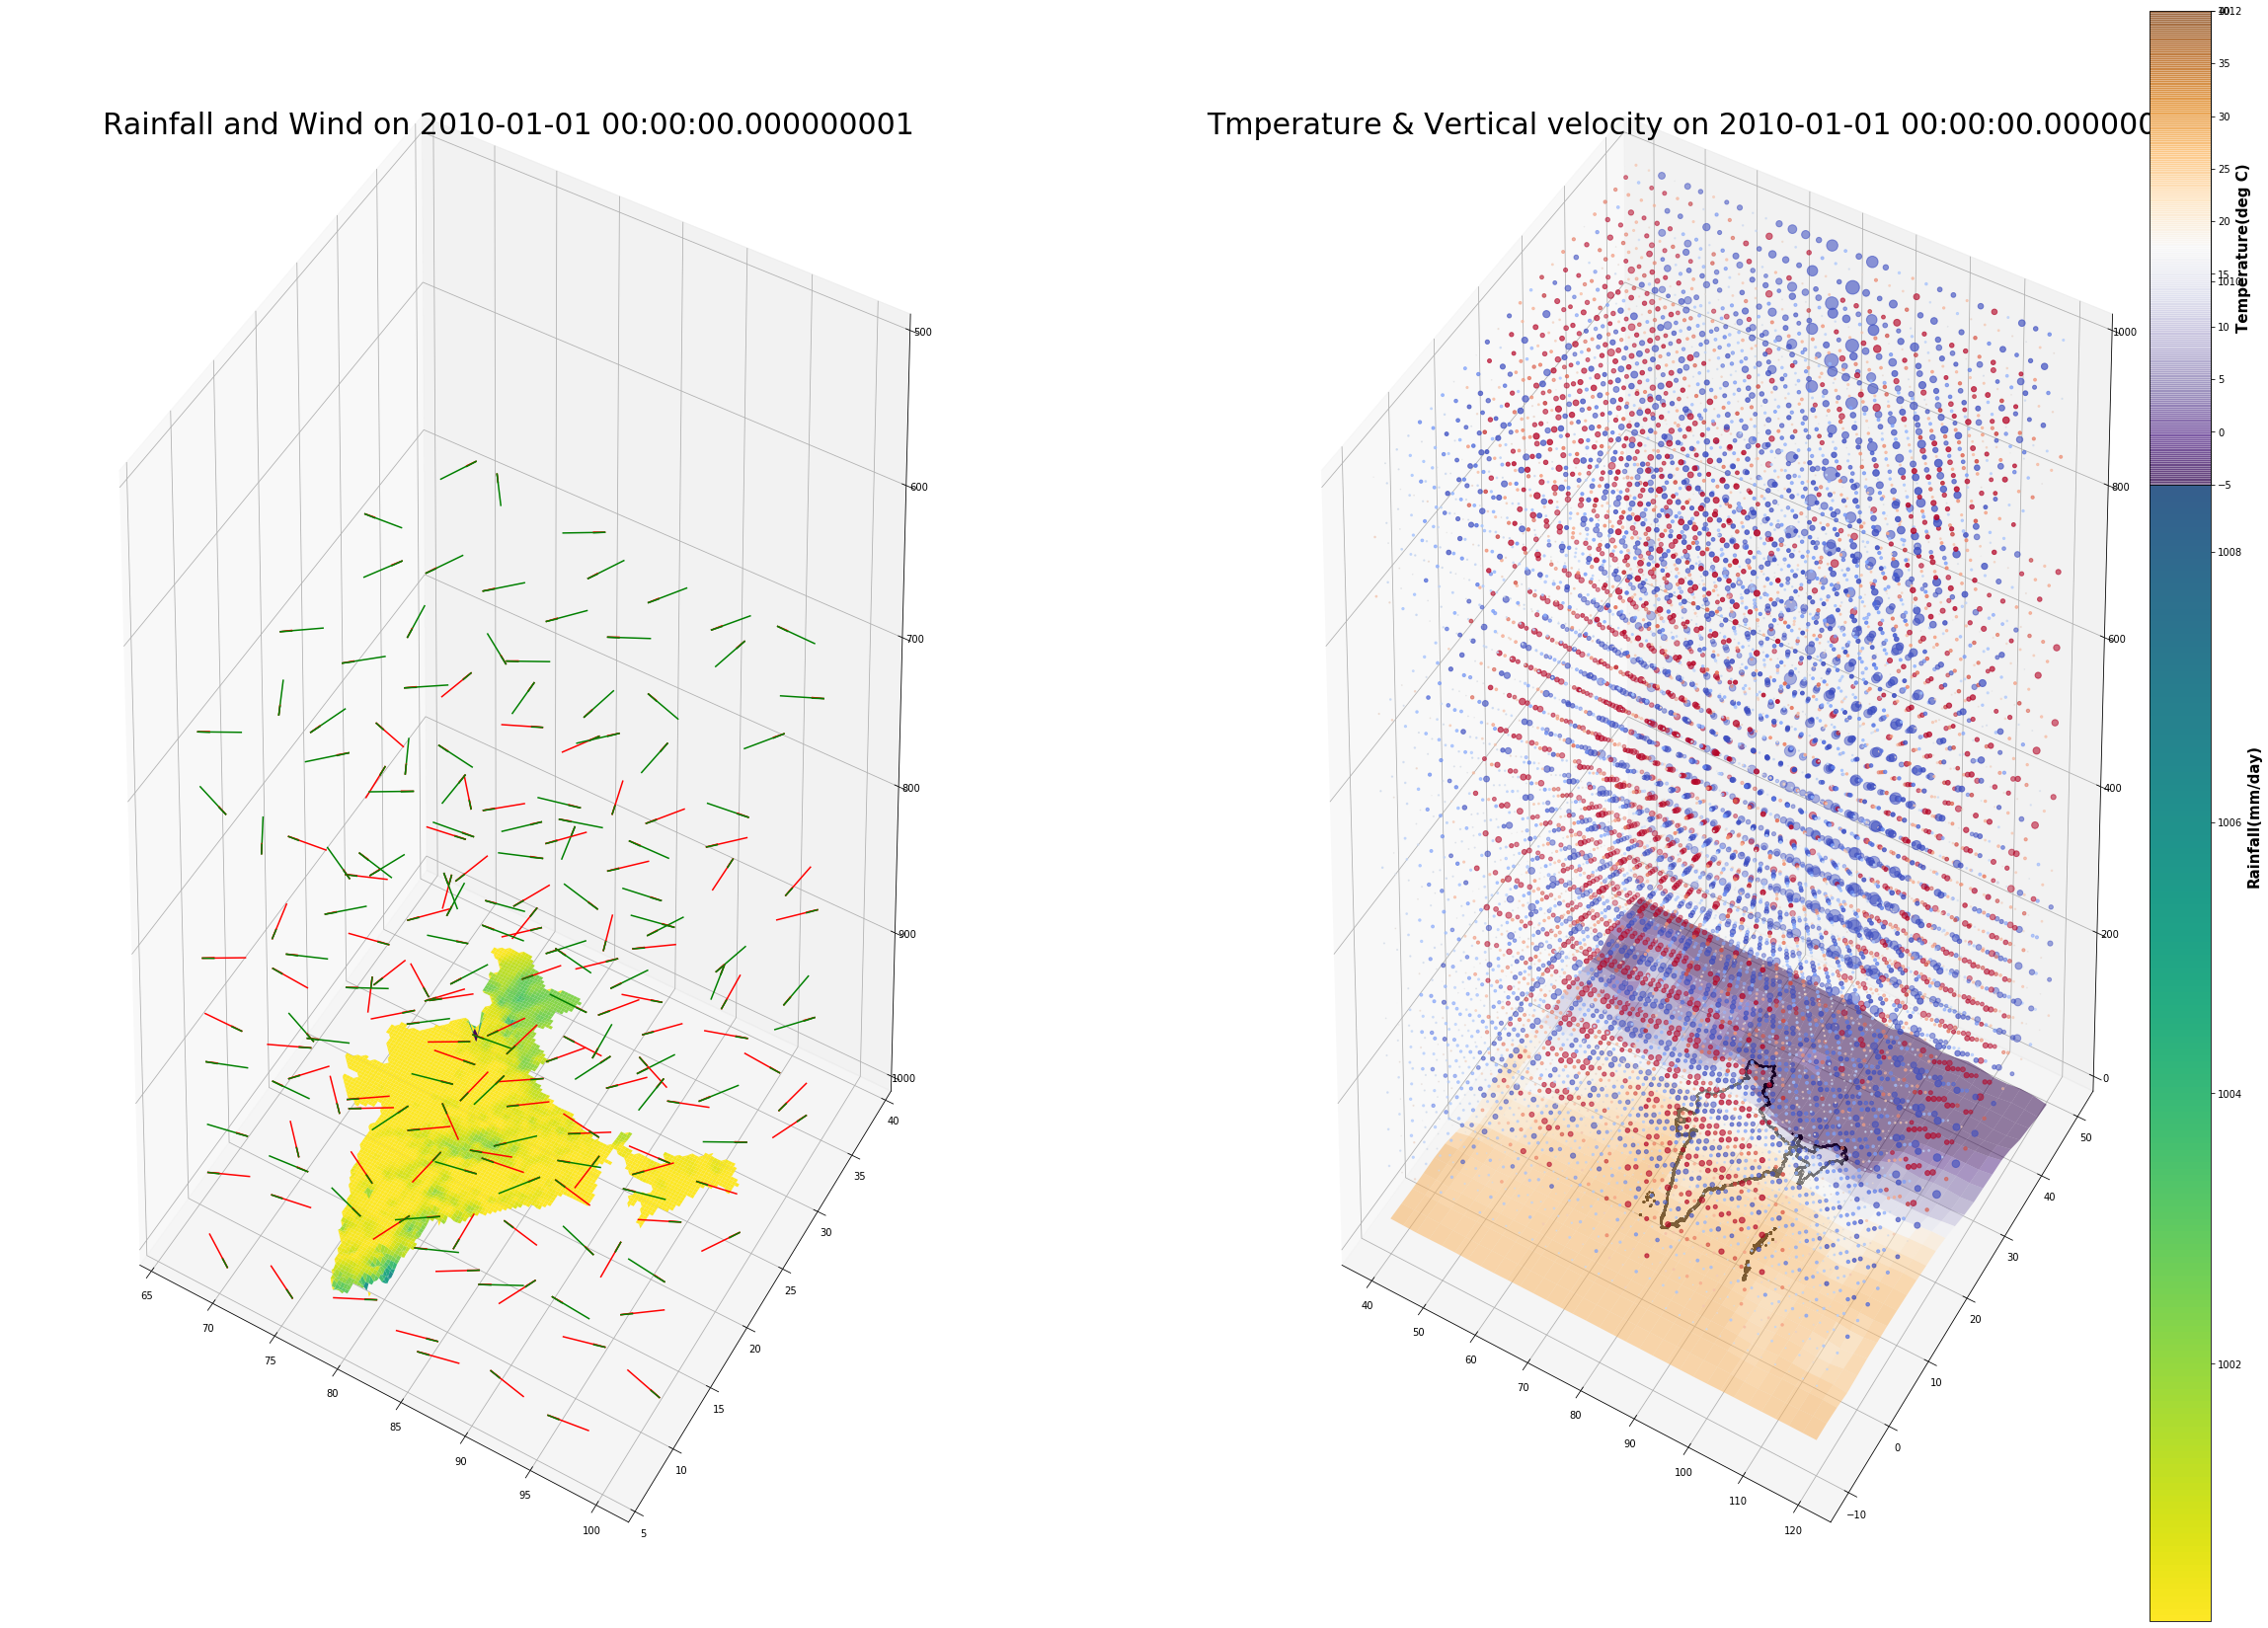

In [38]:
fig = plt.figure(figsize=[40,30])

ax1  = fig.add_subplot(121, projection='3d')
ax2  = fig.add_subplot(122, projection='3d')
#ax3  = fig.add_subplot(133, projection='3d')

cax1 = fig.add_subplot(1,30,30)
cax2 = fig.add_subplot(3,30,30)

def update(iternum):
    ax1.clear()
    ax2.clear()
    #cax.clear()
    #ax1.set_title('Rainfall and Wind circulation on '+ pd.to_datetime(R.dayofyear[iternum]).strftime('%Y-%b-%d'),fontsize= 30)
    #ax2.set_title('Tmperature & Vertical velocity on'+ pd.to_datetime(R.dayofyear[iternum].values).strftime('%Y-%b-%d'),fontsize= 30)
    ax1.set_title('Rainfall and Wind on '+ str(pd.to_datetime(str('2010-1-1')) + pd.to_timedelta(str(R.dayofyear[iternum].values), unit='D')),fontsize= 30)
    ax2.set_title('Tmperature & Vertical velocity on '+ str(pd.to_datetime(str('2010-1-1')) + pd.to_timedelta(str(R.dayofyear[iternum].values), unit='D')),fontsize= 30)

#***********************************rain+u+v+W****************************************
    
    x=R.lon.values
    y=R.lat.values
    X, Y = np.meshgrid(x, y)
    curVals  = R.Rainfall[iternum,:,:].values
    
    p = ax1.plot_surface(X, Y, curVals+1000.0, vmin=0.1+1000.0,vmax=12+1000.,rstride=1, cstride=1,alpha=1,
            cmap='viridis_r',label=np.arange(1,15,5)) #,extend='both')
    cb=fig.colorbar(p, cax=cax1) # Colorbar does not update

    #     cb=fig.colorbar(p,shrink=0.5, aspect=10,label=np.arange(1,100,5) ) # Colorbar does not update
    cb.set_label(label='Rainfall(mm/day)',weight='bold',size=15)
    
    
    uwnd_n=uwnd.sel(lon=slice(66,100),lat=slice(38,6))
    vwnd_n=vwnd.sel(lon=slice(66,100),lat=slice(38,6))
    wwnd_n=omega.sel(lon=slice(66,100),lat=slice(38,6))

    x = uwnd_n.lon[::2]           
    y = vwnd_n.lat[::2]
    z = wwnd_n.level[:4]
    X,Y,Z= np.meshgrid(x, y,z)

    u=uwnd_n.isel(dayofyear=iternum).sel(level=slice(1000.0 ,700.))
    v=vwnd_n.isel(dayofyear=iternum).sel(level=slice(1000.0 ,700.))
    w=0*wwnd_n.isel(dayofyear=iternum).sel(level=slice(1000.0 ,700.))
   
    
    ax1.set_zlim(500, 1000)
    ax1.quiver(X, Y, Z, u.uwnd[:,::2,::2].values.reshape(Z.shape),
              v.vwnd[:,::2,::2].values.reshape(Z.shape), 
              (0*w.omega[:,::2,::2].values.reshape(Z.shape)),
              length=3,color=['r','g'],normalize=True)
    ax1.invert_zaxis()
#**********************************************Temperature**************************************    
    T_crop=T.sel(lon=slice(40,120),lat=slice(50,-10))
    x=T_crop.lon.values
    y=T_crop.lat.values
    X, Y = np.meshgrid(x, y)
    curVals  = T_crop.air[iternum,:,:].values
 
    vmax=40#310
    vmin=-5#260

#     vmax     = np.max(curVals)
#     vmin     = np.min(curVals)
   
    levels   = np.linspace(vmin, vmax, 200, endpoint = True)
    p = ax2.plot_surface(X, Y, curVals-273., rstride=1, cstride=1,alpha=0.5,
            cmap='PuOr_r', vmax=vmax, vmin=vmin, label=levels)
    cb=fig.colorbar(p, cax=cax2) # Colorbar does not update
    cb.set_label(label='Temperature(deg C)',weight='bold',size=15)
    ax2.set_zlim(0, 1000)
#************************************************Omega********************************************
    ax2.scatter(X1,Y1,Z1,c=-500*omega_crop.omega[iternum,:,:,:].values.reshape(Z1.shape).reshape(Z1.shape[0]*Z1.shape[1]*Z1.shape[2]),
                   s=500*np.abs(omega_crop.omega[iternum,:,:,:].values.reshape(Z1.shape).reshape(Z1.shape[0]*Z1.shape[1]*Z1.shape[2])),
               cmap = cm.coolwarm,vmin=-15,vmax=15)
    
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax2.plot(x,y,'ko',markersize=0.5)
    

ani = animation.FuncAnimation(fig, update, frames=150, interval=800, blit=False,
                            repeat_delay=2000)
#plt.show()

In [40]:
ani.save('monsoon_india_150days.gif', writer = 'imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib

C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifa

C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifa

C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifa

C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifa

C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\This-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifa

In [7]:
omega

<xarray.Dataset>
Dimensions:    (dayofyear: 366, lat: 73, level: 12, lon: 144)
Coordinates:
  * level      (level) float32 1000.0 925.0 850.0 700.0 ... 200.0 150.0 100.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    omega      (dayofyear, level, lat, lon) float32 ...

In [8]:
omega_crop=omega.sel(lon=slice(40,120),lat=slice(50,-10))
T_crop=T.sel(lon=slice(40,120),lat=slice(50,-10))

In [10]:
omega_crop=omega.sel(lon=slice(40,120),lat=slice(50,-10))
time = pd.date_range('2000-01-01',periods=366,freq='D')
omega_crop = omega_crop.assign_coords(dayofyear=time)

In [11]:
omega_crop = omega_crop.resample(dayofyear='1M').mean(dim='dayofyear')
X,Y,Z = np.meshgrid(omega_crop.lon[:],omega_crop.lat[:],omega_crop.level[:])

Traceback (most recent call last):
  File "C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\animation.py", line 953, in _start
    self._init_draw()
  File "C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\animation.py", line 1732, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "C:\Users\This-PC\anaconda3\lib\site-packages\matplotlib\animation.py", line 1755, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-15-9390444f6ccf>", line 37, in update
    cmap = cm.coolwarm,vmin=-15,vmax=15)
  File "C:\Users\This-PC\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 2322, in scatter
    *[np.ravel(np.ma.filled(t, np.nan)) for t in [xs, ys, zs]])
  File "<__array_function__ internals>", line 6, in broadcast_arrays
  File "C:\Users\This-PC\anaconda3\lib\site-package

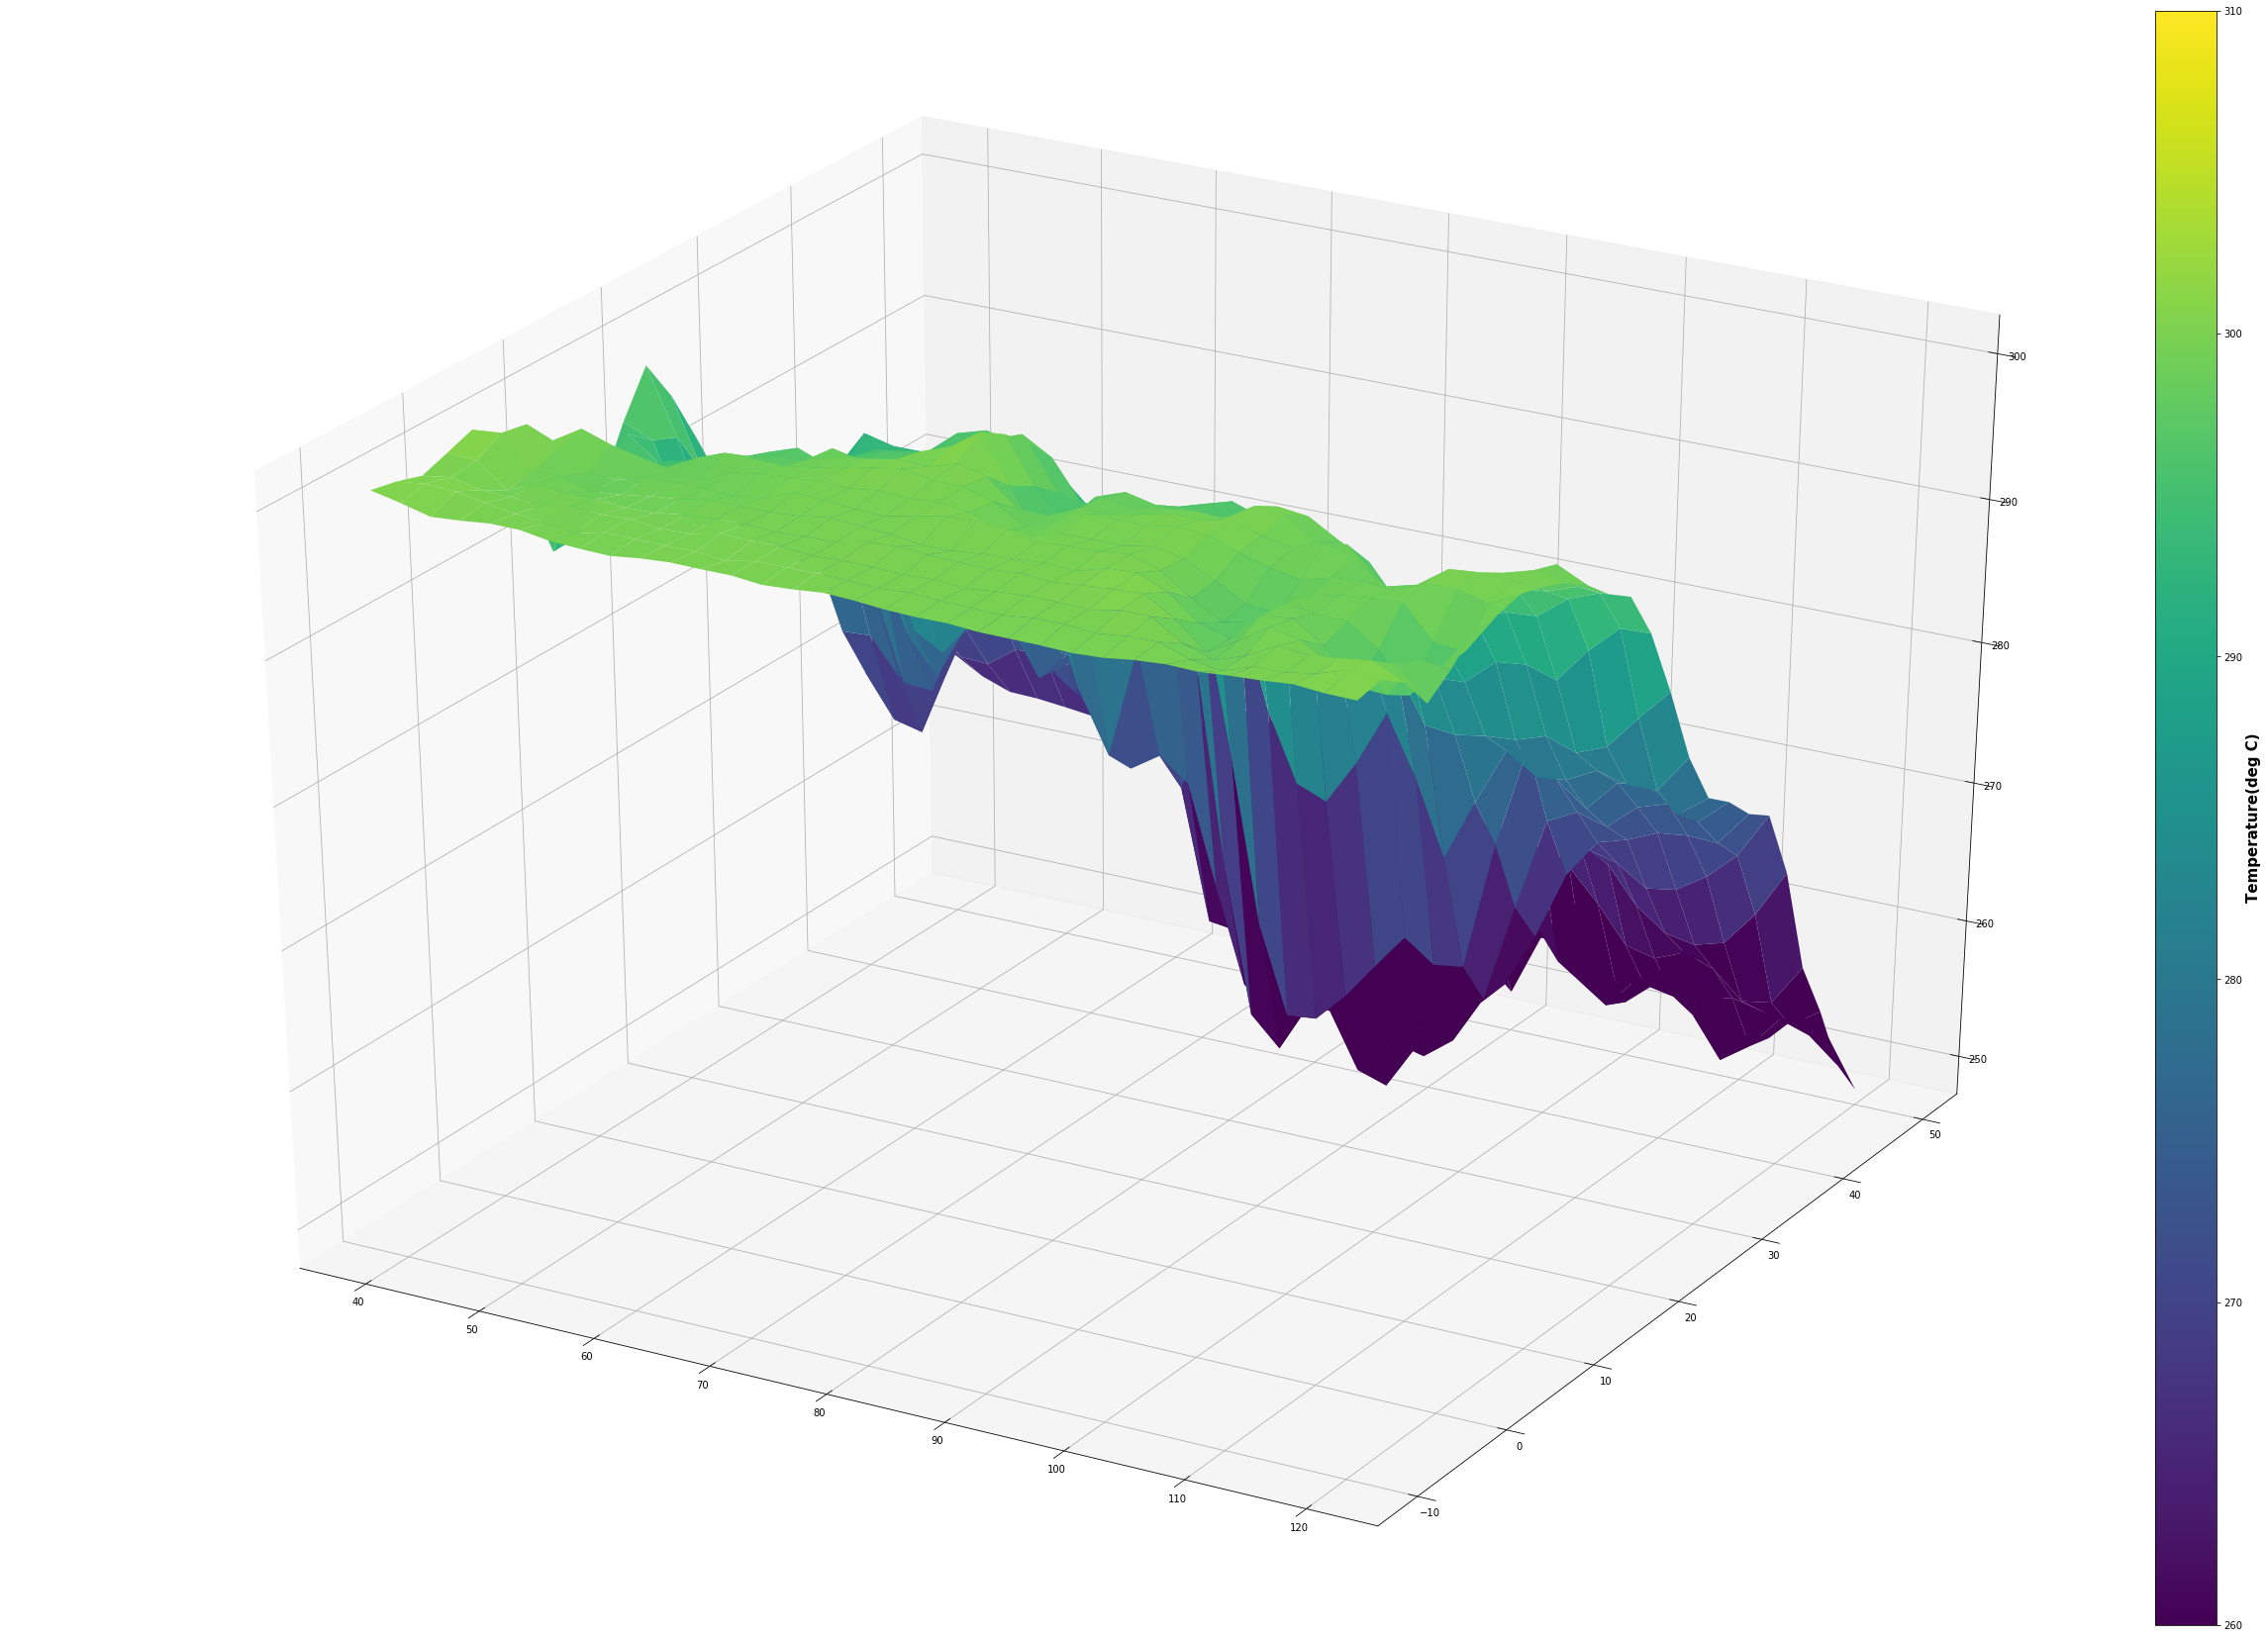

In [15]:
fig = plt.figure(figsize=[40,30])
ax  = fig.add_subplot(111, projection='3d')
cax = fig.add_subplot(1,30,30)

def update(iternum):
    ax.clear()
    cax.clear()
   # ax.set_title('Rainfall and Wind circulation on '+ pd.to_datetime(ds.time[iternum].values).strftime('%Y-%b-%d'),fontsize= 30)
 
   ######## This line change variable of each time steps ###########
  ######## The variable used here has dimension of (time,level,lat,lon)#######
  #  We are trying to animate over time so ime dimension set to iternum
  # and for one level, hence level is set to 0 (You can change the level accordingly)
    
#********************************************Temperature*****************************   
    x=T_crop.lon.values
    y=T_crop.lat.values
    X, Y = np.meshgrid(x, y)
    curVals  = T_crop.air[iternum,:,:].values
 
    vmax=310
    vmin=260

#     vmax     = np.max(curVals)
#     vmin     = np.min(curVals)
   
    levels   = np.linspace(vmin, vmax, 200, endpoint = True)
    p = ax.plot_surface(X, Y, curVals, rstride=1, cstride=1,alpha=1,
            cmap='viridis', vmax=vmax, vmin=vmin, label=levels)
    cb=fig.colorbar(p, cax=cax) # Colorbar does not update
    cb.set_label(label='Temperature(deg C)',weight='bold',size=15)
    
    
#*********************************************Omega*************************************
    ax.scatter(X,Y,Z,c=-500*omega_crop.omega[iternum,:,:,:].values.reshape(Z.shape).reshape(Z.shape[0]*Z.shape[1]*Z.shape[2]),
                   s=500*np.abs(omega_crop.omega[iternum,:,:,:].values.reshape(Z.shape).reshape(Z.shape[0]*Z.shape[1]*Z.shape[2])),
               cmap = cm.coolwarm,vmin=-15,vmax=15)
    

   
 
######### Chnage the frames value as you want, this value is cooresponding to number
# of iteration or number of time steps for animation
ani = animation.FuncAnimation(fig, update, frames=10, interval=800, blit=False,
                            repeat_delay=2000)
plt.show()